## System & Data Setup

In [9]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

#mapping tools

import folium # map rendering library

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

**be sure to load 'Dubai_neighborhoods.csv' into your working directory**

In [10]:
import os
cwd = os.getcwd()
cwd

'C:\\Users\\Agha Abdul Rauf\\Desktop\\coursera_capstone-master'

In [11]:
# read csv file once loaded into working directory listed above
Geospacial_Coordinates = pd.read_csv('Dubai_neighborhoods.csv', sep = ',') 
# examine the shape of original input data
print(Geospacial_Coordinates.shape)

(24, 9)


## Part 2 - Setup Dubai Neighborhood Map

In [12]:
import json
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [13]:
Geo = pd.DataFrame(Geospacial_Coordinates)
Geo.head()

Neighborhood Avg Rent Per Unit  Z-Score  Distance from Palm  \
0        Discovery Gardens            44,672    -1.53                8.18   
1      Dubai Silicon Oasis            54,417    -1.30               24.96   
2  Jumeirah Village Circle            60,068    -1.17                9.16   
3        Dubai Sports City            62,753    -1.10               11.36   
4                  Remraam            67,284    -0.99               16.71   

   Distance from Zabeel  Distance from Jumeirah  Latitude  Longitude  \
0                 26.15                   20.73   25.0390    55.1445   
1                 13.31                   16.39   25.1279    55.3863   
2                 20.56                   16.13   25.0602    55.2094   
3                 22.32                   18.28   25.0391    55.2176   
4                 25.27                   22.27   25.0014    55.2508   

   Unnamed: 8  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [14]:
Geo.dtypes

Neighborhood               object
Avg Rent Per Unit          object
Z-Score                   float64
Distance from Palm        float64
Distance from Zabeel      float64
Distance from Jumeirah    float64
Latitude                  float64
Longitude                 float64
Unnamed: 8                float64
dtype: object

In [15]:
address = 'Dubai, UAE'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Dubai, UAE are {}, {}.'.format(latitude, longitude))

NameError: name 'Nominatim' is not defined

In [8]:
# create map of Dubai using latitude and longitude values
map_dubai = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, neighborhood in zip(Geo['Latitude'], Geo['Longitude'], Geo['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_dubai)  
    
map_dubai

NameError: name 'latitude' is not defined

### Part 2a - initial neighborhood comparison using Foursquare API

In [16]:
CLIENT_ID = 'QTYIHJBWKWZSJNKEVNFPRHLRDSX3PM0UMU2Q2DCBVKMGHEKN' # my Foursquare ID
CLIENT_SECRET = '3EGHPQDUTIH3GEVNQSLNF4025CFAU4F5WO3EQWU1IOTR2ZFG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius = 500
LIMIT = 250

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QTYIHJBWKWZSJNKEVNFPRHLRDSX3PM0UMU2Q2DCBVKMGHEKN
CLIENT_SECRET:3EGHPQDUTIH3GEVNQSLNF4025CFAU4F5WO3EQWU1IOTR2ZFG


In [181]:
neighborhood_latitude = Geo.loc[15, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[15, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[15, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Dubai Marina are 25.0805, 55.1403.


**Now, let's get the top 100 venues that are in Dubai Marina within a radius of 500 meters.**

In [183]:
#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display GET request URL

'https://api.foursquare.com/v2/venues/explore?&client_id=QTYIHJBWKWZSJNKEVNFPRHLRDSX3PM0UMU2Q2DCBVKMGHEKN&client_secret=3EGHPQDUTIH3GEVNQSLNF4025CFAU4F5WO3EQWU1IOTR2ZFG&v=20180605&ll=25.0805,55.1403&radius=500&limit=250'

In [184]:
results = requests.get(url).json()
results # remove ';' if you want to see json data

{'meta': {'code': 200, 'requestId': '5c1778c94c1f670180e88adb'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Dubai Maryna',
  'headerFullLocation': 'Dubai Maryna, Dubai',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 98,
  'suggestedBounds': {'ne': {'lat': 25.085000004500007,
    'lng': 55.145259188937594},
   'sw': {'lat': 25.075999995499995, 'lng': 55.13534081106241}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4efc823d0aafc58694fe66d6',
       'name': 'Zaatar w Zeit',
       'location': {'address': 'Marina walk',
        'lat': 25.08003611949958,
        'lng': 55.142305247548414,
        'labeledLatLngs': [{'label': 'display',
          'lat': 25.080

**clean the json and structure it into a *pandas* dataframe.**

In [185]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [186]:
venues = results['response']['groups'][0]['items']
    
df_Marina = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_Marina = df_Marina.loc[:, filtered_columns]

# filter the category for each row
df_Marina['venue.categories'] = df_Marina.apply(get_category_type, axis=1)

# clean columns

df_Marina.columns = [col.split(".")[-1] for col in df_Marina.columns]
df_Marina.insert(0, 'neighborhood', 'Dubai Marina')

print('{} venues were returned by Foursquare.'.format(df.shape[0]))
df_Marina.head()

98 venues were returned by Foursquare.


neighborhood                            name  \
0  Dubai Marina                   Zaatar w Zeit   
1  Dubai Marina                     Café Bateel   
2  Dubai Marina     Park Island برج پارك آيلاند   
3  Dubai Marina                      Mom's Food   
4  Dubai Marina  MAN'OUSHE STREET (شارع منقوشة)   

                                 categories        lat        lng  
0                 Middle Eastern Restaurant  25.080036  55.142305  
1                                      Café  25.081826  55.138066  
2  Residential Building (Apartment / Condo)  25.082267  55.142127  
3                 Middle Eastern Restaurant  25.082681  55.141600  
4                                    Bakery  25.082042  55.140749

**create a map of the Marina district and highlight nearby venues

In [187]:
map_marina = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=15)

# add markers to map
for lat, lng, name, categories in zip(df_Marina['lat'], df_Marina['lng'], df_Marina['name'], df_Marina['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(map_marina) 
    
map_marina

In [121]:
marina_venues['categories'].value_counts()

Hotel                                       9
Coffee Shop                                 7
Middle Eastern Restaurant                   6
Italian Restaurant                          5
Burger Joint                                4
Asian Restaurant                            4
Lounge                                      4
Restaurant                                  3
Yoga Studio                                 3
Spa                                         2
Gym / Fitness Center                        2
Café                                        2
French Restaurant                           2
Clothing Store                              2
Pool                                        2
Shopping Mall                               2
Breakfast Spot                              2
Waterfront                                  1
Speakeasy                                   1
Grocery Store                               1
Bistro                                      1
Modern European Restaurant        

### Let's create a similar dataframe for each neighborhood: 

**index # 9 - Al Sufouh**

In [168]:
#define objects for 'Al Soufouh' index [9] in Geo
neighborhood_latitude = Geo.loc[9, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[9, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[9, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_ASufouh = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_ASufouh = df_ASufouh.loc[:, filtered_columns]

# filter the category for each row
df_ASufouh['venue.categories'] = df_ASufouh.apply(get_category_type, axis=1)

# clean columns

df_ASufouh.columns = [col.split(".")[-1] for col in df_ASufouh.columns]
df_ASufouh.insert(0, 'neighborhood', 'Al Sufouh')

print('{} venues were returned by Foursquare.'.format(df_ASufouh.shape[0]))
df_ASufouh.head()

5 venues were returned by Foursquare.


neighborhood                                              name  \
0    Al Sufouh                                    Emirates Co-Op   
1    Al Sufouh  Shaikhath Al Arab Cafeteria  شيخة العرب كافتيريا   
2    Al Sufouh                                   Marina Pharmacy   
3    Al Sufouh                                    Al Sufouh Park   
4    Al Sufouh                               Pearl Residence Gym   

      categories        lat        lng  
0  Grocery Store  25.112435  55.173827  
1      Cafeteria  25.112604  55.173924  
2       Pharmacy  25.112530  55.173813  
3     Playground  25.113393  55.171660  
4    College Gym  25.110788  55.179856

**index # 10 DIFC**

In [167]:
#define objects for 'DIFC' index [10] in Geo
neighborhood_latitude = Geo.loc[10, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[10, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[10, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_DIFC = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_DIFC = df_DIFC.loc[:, filtered_columns]

# filter the category for each row
df_DIFC['venue.categories'] = df_DIFC.apply(get_category_type, axis=1)

# clean columns

df_DIFC.columns = [col.split(".")[-1] for col in df_DIFC.columns]
df_DIFC.insert(0, 'neighborhood', 'DIFC')

print('{} venues were returned by Foursquare.'.format(df_DIFC.shape[0]))
df_DIFC.head()

75 venues were returned by Foursquare.


neighborhood                 name          categories        lat        lng
0         DIFC     The Ritz-Carlton               Hotel  25.212517  55.279399
1         DIFC    The Sunken Garden          Hookah Bar  25.212093  55.280039
2         DIFC     Burger & Lobster  Seafood Restaurant  25.211287  55.281787
3         DIFC           Café Belge  Belgian Restaurant  25.212062  55.279914
4         DIFC  Carnival by Tresind   Indian Restaurant  25.211010  55.282113

**index # 11 Business Bay**

In [169]:
#define objects for 'Business_Bay' index [11] in Geo
neighborhood_latitude = Geo.loc[11, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[11, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[11, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_Business_Bay = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_Business_Bay = df_Business_Bay.loc[:, filtered_columns]

# filter the category for each row
df_Business_Bay['venue.categories'] = df_Business_Bay.apply(get_category_type, axis=1)

# clean columns

df_Business_Bay.columns = [col.split(".")[-1] for col in df_Business_Bay.columns]
df_Business_Bay.insert(0, 'neighborhood', 'Business Bay')

print('{} venues were returned by Foursquare.'.format(df_Business_Bay.shape[0]))
df_Business_Bay.head()

22 venues were returned by Foursquare.


neighborhood                               name                 categories  \
0  Business Bay  Renaissance Downtown Hotel, Dubai                      Hotel   
1  Business Bay                             Basta!         Italian Restaurant   
2  Business Bay                               BHAR  Middle Eastern Restaurant   
3  Business Bay                           Morimoto        Japanese Restaurant   
4  Business Bay               Six Senses Spa Dubai                        Spa   

         lat        lng  
0  25.185675  55.273650  
1  25.185750  55.273635  
2  25.185598  55.273534  
3  25.185781  55.273444  
4  25.186095  55.273474

**index # 12 Jumeirah Lakes Towers**

In [188]:
#define objects for 'JLT' index [12] in Geo
neighborhood_latitude = Geo.loc[12, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[12, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[12, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_JLT = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_JLT = df_JLT.loc[:, filtered_columns]

# filter the category for each row
df_JLT['venue.categories'] = df_JLT.apply(get_category_type, axis=1)

# clean columns

df_JLT.columns = [col.split(".")[-1] for col in df_JLT.columns]
df_JLT.insert(0, 'neighborhood', 'Jumeirah Lakes Towers')

print('{} venues were returned by Foursquare.'.format(df_JLT.shape[0]))
df_JLT.head()

33 venues were returned by Foursquare.


neighborhood                   name             categories  \
0  Jumeirah Lakes Towers       Wokyo Noodle Bar           Noodle House   
1  Jumeirah Lakes Towers                 Betawi  Indonesian Restaurant   
2  Jumeirah Lakes Towers            Bait Maryam       Theme Restaurant   
3  Jumeirah Lakes Towers  Fidelity Fitness Club                    Gym   
4  Jumeirah Lakes Towers            Golositalia     Italian Restaurant   

         lat        lng  
0  25.068151  55.140931  
1  25.069993  55.141876  
2  25.070765  55.141889  
3  25.068784  55.141660  
4  25.069462  55.140268

**index 13 Barsha Heights**

In [189]:
#define objects for 'Barsha' index [12] in Geo
neighborhood_latitude = Geo.loc[13, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[13, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[13, 'Neighborhood'] # neighborhood name

#step 1 - create the correct GET request URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

venues = results['response']['groups'][0]['items']
    
df_Barsha = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
df_Barsha = df_Barsha.loc[:, filtered_columns]

# filter the category for each row
df_Barsha['venue.categories'] = df_Barsha.apply(get_category_type, axis=1)

# clean columns

df_Barsha.columns = [col.split(".")[-1] for col in df_Barsha.columns]
df_Barsha.insert(0, 'neighborhood', 'Barsha Heights')

print('{} venues were returned by Foursquare.'.format(df_Barsha.shape[0]))
df_Barsha.head()

62 venues were returned by Foursquare.


neighborhood                        name            categories  \
0  Barsha Heights  AURIS INN Al MUHANNA Hotel                 Hotel   
1  Barsha Heights          MMA Fitness Center  Gym / Fitness Center   
2  Barsha Heights       TRYP by Wyndham Dubai                 Hotel   
3  Barsha Heights                     Fuchsia       Thai Restaurant   
4  Barsha Heights          Media Rotana Hotel                 Hotel   

         lat        lng  
0  25.094750  55.177058  
1  25.096647  55.175727  
2  25.097234  55.174834  
3  25.095363  55.178584  
4  25.099642  55.179447

**analysis of venue distribution**

In [250]:
df_venues = pd.concat([df_Barsha, df_JLT, df_Business_Bay, df_DIFC, df_Marina, df_ASufouh])
df_venues['count'] = 1
df_venues.shape

(295, 6)

In [260]:
total_venues = pd.pivot_table(df_venues,index=["neighborhood"], values=["count"],aggfunc=np.sum)
total_venues

count
neighborhood                
Al Sufouh                  5
Barsha Heights            62
Business Bay              22
DIFC                      75
Dubai Marina              98
Jumeirah Lakes Towers     33

In [268]:
df_venues2 = df_venues.copy()
df_venues3 = df_venues.copy()
df_venues_rest = df_venues2[df_venues2['categories'].str.contains('Restaurant')].reset_index(drop=True)
df_venues_rest['Venue Type'] = 'Restaurant'
df_venues_hotel = df_venues3[df_venues3['categories'].str.contains('Hotel')].reset_index(drop=True)
df_venues_hotel['Venue Type'] = 'Hotel'
df_venues_final = pd.concat([df_venues_rest,df_venues_hotel]).reset_index(drop=True)
df_venues_final.shape

(133, 7)

In [269]:
pivot = pd.pivot_table(df_venues_final,index=["neighborhood","Venue Type"], values=["count"],aggfunc=np.sum)
pivot

count
neighborhood          Venue Type       
Barsha Heights        Hotel          14
                      Restaurant     18
Business Bay          Hotel           2
                      Restaurant     12
DIFC                  Hotel           5
                      Restaurant     25
Dubai Marina          Hotel           9
                      Restaurant     32
Jumeirah Lakes Towers Hotel           1
                      Restaurant     15

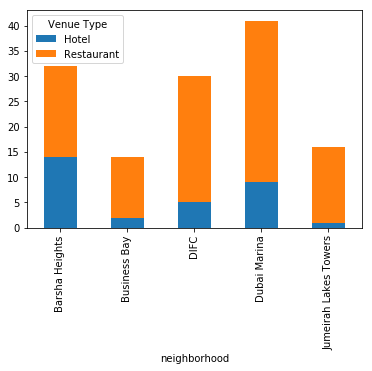

In [247]:
df_venues_final.groupby('neighborhood')['Venue Type']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)

**create 'one hot' file with dummy values by venue category**

In [261]:
# one hot encoding
dubai_onehot = pd.get_dummies(df_venues_final[['categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
dubai_onehot['neighborhood'] = df_venues_final['neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [dubai_onehot.columns[-1]] + list(dubai_onehot.columns[:-1])
dubai_onehot = dubai_onehot[fixed_columns]

dubai_onehot.head()

neighborhood  African Restaurant  American Restaurant  Asian Restaurant  \
0  Barsha Heights                   0                    0                 0   
1  Barsha Heights                   0                    0                 0   
2  Barsha Heights                   0                    0                 0   
3  Barsha Heights                   0                    0                 0   
4  Barsha Heights                   0                    0                 0   

   Belgian Restaurant  Caribbean Restaurant  Chinese Restaurant  \
0                   0                     0                   0   
1                   0                     0                   0   
2                   0                     0                   1   
3                   0                     0                   0   
4                   0                     0                   0   

   Comfort Food Restaurant  Eastern European Restaurant  English Restaurant  \
0                        0                            0                   0   
1                        0                            0                   0   
2                        0                            0                   0   
3                        0                            0                   0   
4                        0                            0                   0   

           ...            Peruvian Restaurant  Restaurant  Russian Restaurant  \
0          ...                              0           0                   0   
1          ...                              0           0                   0   
2          ...                              0           0                   0   
3          ...                              0           0                   0   
4          ...                              0           0                   0   

   Seafood Restaurant  Sushi Restaurant  Tapas Restaurant  Thai Restaurant  \
0                   0                 0                 0                1   
1                   0                 0                 0                0   
2                   0                 0                 0                0   
3                   0                 0                 0                0   
4                   0                 0                 0                0   

   Theme Restaurant  Turkish Restaurant  Vietnamese Restaurant  
0                 0                   0                      0  
1                 0                   0                      0  
2                 0                   0                      0  
3                 0                   0                      0  
4                 0                   0                      0  

[5 rows x 36 columns]

**Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [262]:
dubai_grouped = dubai_onehot.groupby('neighborhood').mean().reset_index()
dubai_grouped

neighborhood  African Restaurant  American Restaurant  \
0         Barsha Heights            0.000000             0.000000   
1           Business Bay            0.000000             0.000000   
2                   DIFC            0.033333             0.033333   
3           Dubai Marina            0.000000             0.024390   
4  Jumeirah Lakes Towers            0.000000             0.062500   

   Asian Restaurant  Belgian Restaurant  Caribbean Restaurant  \
0          0.000000            0.000000               0.00000   
1          0.000000            0.000000               0.00000   
2          0.066667            0.033333               0.00000   
3          0.097561            0.000000               0.02439   
4          0.000000            0.000000               0.00000   

   Chinese Restaurant  Comfort Food Restaurant  Eastern European Restaurant  \
0            0.031250                  0.03125                      0.00000   
1            0.071429                  0.00000                      0.00000   
2            0.033333                  0.00000                      0.00000   
3            0.024390                  0.00000                      0.02439   
4            0.000000                  0.00000                      0.00000   

   English Restaurant          ...            Peruvian Restaurant  Restaurant  \
0            0.000000          ...                       0.000000    0.000000   
1            0.000000          ...                       0.000000    0.214286   
2            0.033333          ...                       0.033333    0.100000   
3            0.024390          ...                       0.000000    0.073171   
4            0.000000          ...                       0.000000    0.062500   

   Russian Restaurant  Seafood Restaurant  Sushi Restaurant  Tapas Restaurant  \
0             0.00000            0.000000           0.00000          0.000000   
1             0.00000            0.000000           0.00000          0.071429   
2             0.00000            0.033333           0.00000          0.000000   
3             0.02439            0.000000           0.02439          0.000000   
4             0.00000            0.000000           0.06250          0.000000   

   Thai Restaurant  Theme Restaurant  Turkish Restaurant  \
0           0.0625            0.0000             0.03125   
1           0.0000            0.0000             0.00000   
2           0.0000            0.0000             0.00000   
3           0.0000            0.0000             0.00000   
4           0.0625            0.0625             0.00000   

   Vietnamese Restaurant  
0                  0.000  
1                  0.000  
2                  0.000  
3                  0.000  
4                  0.125  

[5 rows x 36 columns]

In [263]:
dubai_grouped.shape

(5, 36)

**Let's print each neighborhood along with the top 5 most common venues**

In [265]:
num_top_venues = 5

for hood in dubai_grouped['neighborhood']:
    print("----"+hood+"----")
    temp = dubai_grouped[dubai_grouped['neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barsha Heights----
                       venue  freq
0                      Hotel  0.41
1  Middle Eastern Restaurant  0.19
2         Italian Restaurant  0.06
3            Thai Restaurant  0.06
4         Mexican Restaurant  0.03


----Business Bay----
                       venue  freq
0                 Restaurant  0.21
1         Italian Restaurant  0.14
2  Middle Eastern Restaurant  0.14
3                      Hotel  0.14
4          German Restaurant  0.07


----DIFC----
                venue  freq
0               Hotel  0.17
1  Italian Restaurant  0.13
2          Restaurant  0.10
3   Indian Restaurant  0.10
4    Asian Restaurant  0.07


----Dubai Marina----
                       venue  freq
0                      Hotel  0.22
1  Middle Eastern Restaurant  0.15
2         Italian Restaurant  0.12
3           Asian Restaurant  0.10
4                 Restaurant  0.07


----Jumeirah Lakes Towers----
                   venue  freq
0     Italian Restaurant  0.19
1  Vietnamese Restaurant

**First, let's write a function to sort the venues in descending order.**

In [266]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [267]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['neighborhood'] = dubai_grouped['neighborhood']

for ind in np.arange(dubai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(dubai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

neighborhood 1st Most Common Venue      2nd Most Common Venue  \
0         Barsha Heights                 Hotel  Middle Eastern Restaurant   
1           Business Bay            Restaurant         Italian Restaurant   
2                   DIFC                 Hotel         Italian Restaurant   
3           Dubai Marina                 Hotel  Middle Eastern Restaurant   
4  Jumeirah Lakes Towers    Italian Restaurant      Vietnamese Restaurant   

       3rd Most Common Venue       4th Most Common Venue 5th Most Common Venue  
0         Italian Restaurant             Thai Restaurant             Hotel Bar  
1  Middle Eastern Restaurant                       Hotel      Tapas Restaurant  
2                 Restaurant           Indian Restaurant      Asian Restaurant  
3         Italian Restaurant            Asian Restaurant            Restaurant  
4           Theme Restaurant  Modern European Restaurant   American Restaurant

In [272]:
#define objects for 'DIFC' index [10] in Geo
neighborhood_latitude = Geo.loc[10, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Geo.loc[10, 'Longitude'] # neighborhood longitude value
neighborhood_name = Geo.loc[10, 'Neighborhood'] # neighborhood name

map_DIFC = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=15)

# add markers to map
for lat, lng, name, categories in zip(df_DIFC['lat'], df_DIFC['lng'], df_DIFC['name'], df_DIFC['categories']):
  label = '{},{}'.format(categories,name)
  label = folium.Popup(label, parse_html=True)
  folium.CircleMarker(
      [lat, lng],
      radius=5,
      popup=label,
      color='blue',
      fill=True,
      fill_color='#3186cc',
      fill_opacity=0.7).add_to(map_DIFC) 
    
map_DIFC